### Predicting Heart Failre Survival Using K-Nearest Neighbors (KNN) ###


# Table of Contents
1. [Introduction](#Introduction)
2. [Data Collection & Loading](#Data-Collection-&-Loading)
3. [Data Validation](#Data-Validation)
4. [Feature Selection](#Feature-Selection)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Implementing KNN Model](#Implementing-KNN-Model)
7. [Hyperparameter Optimization](#Hyperparameter-Optimization) 
   - 7.1 [k-number of neighbors](#k-number-of-neighbors) 
   - 7.2 [Estimating the Distance method](#Estimating-the-Distance-method) 
   - 7.3 [Weighting Method](#Weighting-Method)
8. [Model Evaluation](#Model-Evaluation)
9. [Comparison with the Original Paper](#Comparison-with-the-Original-Paper)
10. [Conclusion & Future Work](#Conclusion-&-Future-Work)
6. [References](#References)


## Introduction ##

The primary objective of this project is to develop a machine learning model capable of predicting the survival or death of heart failure patients based on a set of clinical features. We employed the K-Nearest Neighbors (KNN) algorithm for this task.

The dataset was sourced from the UCI Machine Learning Repository, which provides open-access data. After verifying the cleanliness of the data, we assessed its balance, preprocessed it, and applied normalization to mitigate potential bias. We then optimized the model parameters based on four key performance metrics: accuracy, precision, recall, and F1-score. The resulting model was evaluated and compared with the findings of the primary reference paper [2]. Our results demonstrate a significant improvement over those reported in the reference, likely attributable to our model's parameter optimization.

It should be noted that this project does not perform feature selection and instead adopts the same features as those selected in the main reference [2].

## Data Collection & Loading ##

We have used a public database from UCI Machine Learning Repository called "Heart Failure Clinical Records" [1]. This database includes data about 299 patiens who had heart failure. thirteen clinical features are provided for every record. 

In [46]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


As it is shown in the above table, the following fields are provided:

In [49]:
df.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

## Data Validation ##

to validate the data we can check throguh the following codes:

In [52]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

So, no null cell has been detected.

In [55]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

There is no "object" dtype, which is usually because of the multiple data type in a column. in the other words, if a column of type int64, has a wrong value of type text, the column dtype will be shown as object. So, our data-frame seems to be pure, from this point of view.

In [68]:
for column in df.select_dtypes(include=['int64','float64']).columns:
    print(f"{column}: Min = {df[column].min()}, Max = {df[column].max()}")

age: Min = 40.0, Max = 95.0
anaemia: Min = 0, Max = 1
creatinine_phosphokinase: Min = 23, Max = 7861
diabetes: Min = 0, Max = 1
ejection_fraction: Min = 14, Max = 80
high_blood_pressure: Min = 0, Max = 1
platelets: Min = 25100.0, Max = 850000.0
serum_creatinine: Min = 0.5, Max = 9.4
serum_sodium: Min = 113, Max = 148
sex: Min = 0, Max = 1
smoking: Min = 0, Max = 1
time: Min = 4, Max = 285
DEATH_EVENT: Min = 0, Max = 1


the data range of numeric cells is OK.

In [71]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


So, we can confirm the dataframe is properly prepared, and there is no need for extra-prepration or purification.

## Feature Selection ##

According to the main reference of this project [2], the main two features <span style="font-weight:bold">"serum ceratinine"</span> and <span style="font-weight:bold">"ejection fraction"</span> are sufficient to predict the survival of heart failure patients. At the moment, we neglect the statistical process that leads to the proof of this statement.   

In [97]:
X = df[["serum_creatinine","ejection_fraction"]]
y = df[["DEATH_EVENT"]]

## Data Preprocessing ##

The data we want to work are as follows:

In [155]:
print(f"{"Item"} \t {"serum_creatinine"} \t {"ejection_fraction"} \t {"DEATH_EVENT"}")
for index, row in pd.concat([X, y], axis=1).iterrows():
    print(f"{index} \t {row["serum_creatinine"]} \t\t\t\t {row["ejection_fraction"]} \t\t\t {row["DEATH_EVENT"]}")

Item 	 serum_creatinine 	 ejection_fraction 	 DEATH_EVENT
0 	 1.9 				 20.0 			 1.0
1 	 1.1 				 38.0 			 1.0
2 	 1.3 				 20.0 			 1.0
3 	 1.9 				 20.0 			 1.0
4 	 2.7 				 20.0 			 1.0
5 	 2.1 				 40.0 			 1.0
6 	 1.2 				 15.0 			 1.0
7 	 1.1 				 60.0 			 1.0
8 	 1.5 				 65.0 			 1.0
9 	 9.4 				 35.0 			 1.0
10 	 4.0 				 38.0 			 1.0
11 	 0.9 				 25.0 			 1.0
12 	 1.1 				 30.0 			 1.0
13 	 1.1 				 38.0 			 1.0
14 	 1.0 				 30.0 			 0.0
15 	 1.3 				 50.0 			 1.0
16 	 0.9 				 38.0 			 1.0
17 	 0.8 				 14.0 			 1.0
18 	 1.0 				 25.0 			 1.0
19 	 1.9 				 55.0 			 1.0
20 	 1.3 				 25.0 			 0.0
21 	 1.6 				 30.0 			 1.0
22 	 0.9 				 35.0 			 1.0
23 	 0.8 				 60.0 			 0.0
24 	 1.83 				 30.0 			 1.0
25 	 1.9 				 38.0 			 1.0
26 	 1.0 				 40.0 			 1.0
27 	 1.3 				 45.0 			 1.0
28 	 5.8 				 38.0 			 1.0
29 	 1.2 				 30.0 			 1.0
30 	 1.83 				 38.0 			 1.0
31 	 3.0 				 45.0 			 1.0
32 	 1.0 				 35.0 			 1.0
33 	 1.2 				 30.0 			 0.0
34 	 1.0 				 50.0 			 1.0
35 	 

In [163]:
print(f"Min and Max values for serum_creatinine = {df["serum_creatinine"].min()} and {df["serum_creatinine"].max()}")
print(f"Min and Max values for ejection_fraction = {df["ejection_fraction"].min()} and {df["ejection_fraction"].max()}")

Min and Max values for serum_creatinine = 0.5 and 9.4
Min and Max values for ejection_fraction = 14 and 80


From the above provided data, it is clear that the numerical range of features are in different orders of magnitutes. So when estimating the distance between points, in KNN method, this may lead to domination of serum_creatinine feature, which its values are much more smaller. To fix this issue we will normalize the data. Initially we will use Min-Max Scaling method for normalization.

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['serum_creatinine', 'ejection_fraction'])
print(f"{"Item"} \t {"serum_creatinine"} \t\t\t\t {"ejection_fraction"} \t\t\t {"DEATH_EVENT"}")
for index, row in pd.concat([X_scaled, y], axis=1).iterrows():
    print(f"{index} \t {row["serum_creatinine"]} \t\t\t\t {row["ejection_fraction"]} \t\t\t {row["DEATH_EVENT"]}")


Item 	 serum_creatinine 				 ejection_fraction 			 DEATH_EVENT
0 	 0.15730337078651685 				 0.09090909090909091 			 1.0
1 	 0.06741573033707866 				 0.36363636363636365 			 1.0
2 	 0.0898876404494382 				 0.09090909090909091 			 1.0
3 	 0.15730337078651685 				 0.09090909090909091 			 1.0
4 	 0.24719101123595508 				 0.09090909090909091 			 1.0
5 	 0.1797752808988764 				 0.3939393939393939 			 1.0
6 	 0.07865168539325842 				 0.015151515151515166 			 1.0
7 	 0.06741573033707866 				 0.696969696969697 			 1.0
8 	 0.11235955056179775 				 0.7727272727272727 			 1.0
9 	 0.9999999999999999 				 0.3181818181818181 			 1.0
10 	 0.3932584269662921 				 0.36363636363636365 			 1.0
11 	 0.0449438202247191 				 0.16666666666666666 			 1.0
12 	 0.06741573033707866 				 0.24242424242424246 			 1.0
13 	 0.06741573033707866 				 0.36363636363636365 			 1.0
14 	 0.056179775280898875 				 0.24242424242424246 			 0.0
15 	 0.0898876404494382 				 0.5454545454545454 			 1.0
16 	 0.0449438202247191 				 

So, the features ranges are properly set. Now, before spliting, we have to check if the dataset is balanced.

In [232]:
import numpy as np
result =  np.unique(y, return_counts=True)
ratio = result[1][1]/result[1][0]
print(f"The ratio of death event to survival in the dataset are {ratio}")
print("")

The ratio of death event to survival in the dataset are 0.4729064039408867



So, we will use stratify spliting, to ensure all of train and test sets prepared with similar ratio.

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,stratify=y)

The following plot, shows the data that will be used to train the ML model.

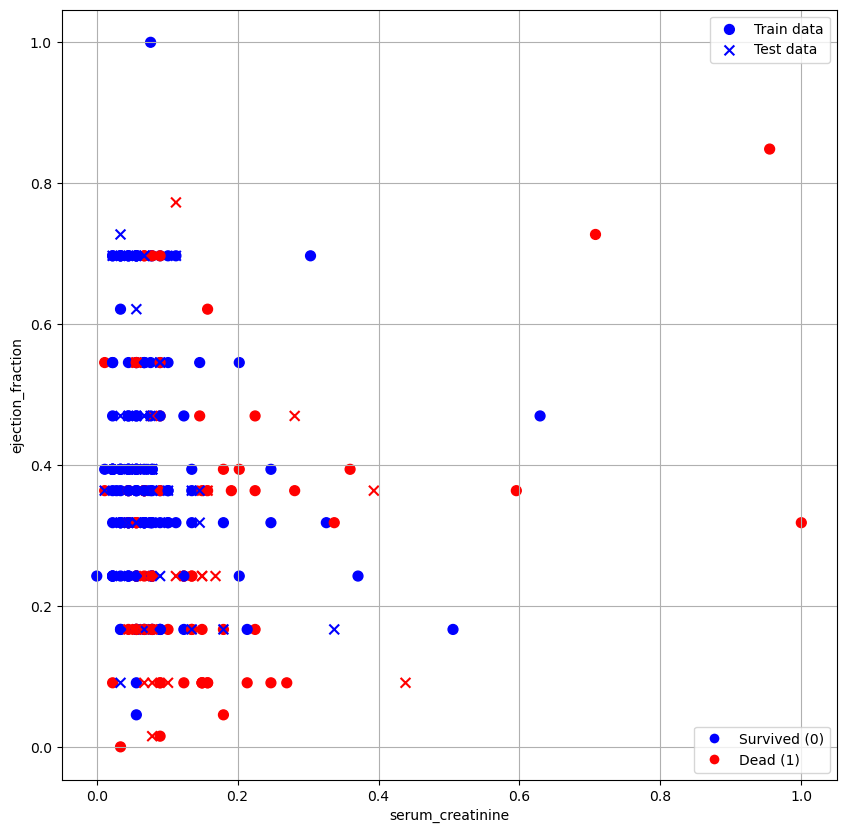

In [319]:
import matplotlib.pyplot as plt

X_train_points_x_axis = X_train["serum_creatinine"] 
X_train_points_y_axis = X_train["ejection_fraction"]

X_test_points_x_axis = X_test["serum_creatinine"] 
X_test_points_y_axis = X_test["ejection_fraction"]

color_selector = {
    0: 'blue', #survived
    1: 'red'   #dead
}
plt.figure(figsize=(10,10))
plt.scatter(
    X_train_points_x_axis,
    X_train_points_y_axis,
    s=50,
    c=[color_selector[y] for y in y_train],
    marker='o',
    label="Train data"
)
plt.scatter(
    X_test_points_x_axis,
    X_test_points_y_axis,
    s=50,
    marker='x',
    c=[color_selector[y] for y in y_test],
    label="Test data"
)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.axis('equal')
plt.grid(True)
plt.legend()
# --- Create custom legend for colors ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Survived (0)', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Dead (1)', markerfacecolor='red', markersize=8)
]

# Add both legends
first_legend = plt.legend(loc='upper right')  # Default legend (Train/Test)
plt.gca().add_artist(first_legend)  # Prevents overwriting
plt.legend(handles=legend_elements, loc='lower right')  # Color legend
plt.show()            

## Implementing KNN Model ##

We will create a KNN model and train it using the available data, prepared in the previous sections.

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


def calc_metrics(tn, fp, fn, tp,parameter):
    if (parameter == 'accuracy'):
        return (tn+tp)/(tn+tp+fp+fn);
    elif (parameter == 'precision'):
        if (tp+fp != 0):
            return tp/(tp+fp);
        else:
            return 0;
    elif (parameter == 'recall'):
        return tp/(tp+fn);
    elif (parameter == 'f1'):
        precision = (tn+tp)/(tn+tp+fp+fn);
        recall = tp/(tp+fn);
        return (2*(precision*recall)/(precision+recall));
    return 0;


      
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train,y_train)
tn,fp,fn,tp = confusion_matrix(y_test,clf.predict(X_test)).ravel()
accuracy = calc_metrics(tn,fp,fn,tp,'accuracy')
precision = calc_metrics(tn,fp,fn,tp,'precision')
recall = calc_metrics(tn,fp,fn,tp,'recall')
f1 = calc_metrics(tn,fp,fn,tp,'f1')

print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")


accuracy = 0.7333333333333333
precision = 0.625
recall = 0.4166666666666667
f1 = 0.5314009661835749


The following table will show the test set and the correctness of prediction:

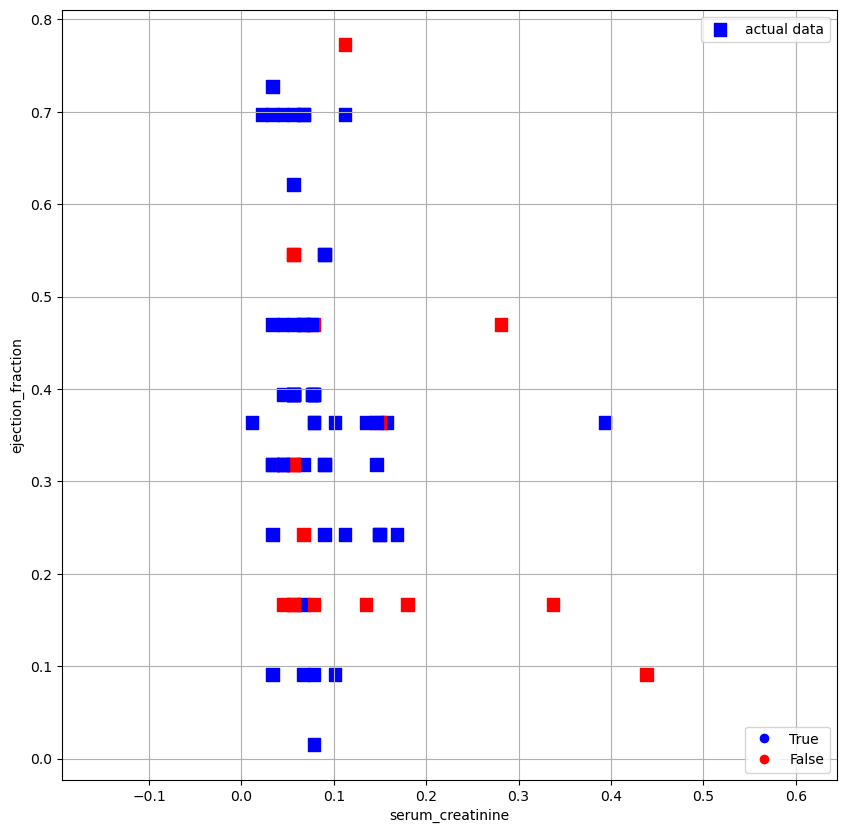

In [355]:
import matplotlib.pyplot as plt

X_test_points_x_axis = X_test["serum_creatinine"] 
X_test_points_y_axis = X_test["ejection_fraction"]

y_predict = clf.predict(X_test)
y_predict_bool = y_test == y_predict
color_selector = {
    1: 'blue', #True
    0: 'red'   #False
}
plt.figure(figsize=(10,10))
plt.scatter(
    X_test_points_x_axis,
    X_test_points_y_axis,
    s=80,
    marker='s',
    c=[color_selector[y] for y in y_predict_bool],
    label='actual data',
)

plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.axis('equal')
plt.grid(True)
plt.legend()
# --- Create custom legend for colors ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='True', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='False', markerfacecolor='red', markersize=8)
]

# Add both legends
first_legend = plt.legend(loc='upper right')  # Default legend (Train/Test)
plt.gca().add_artist(first_legend)  # Prevents overwriting
plt.legend(handles=legend_elements, loc='lower right')  # Color legend
plt.show()            

## Hyperparameter Optimization ##

Now, to find out the best set of parameters, such as number of neighbors, method of estimating distance, weighting method, etc., we will handle few tests. The first parameter, is number of neighbors. The following code, compares the learning performance for different number of neighbors.

### k - number of neighbors ###

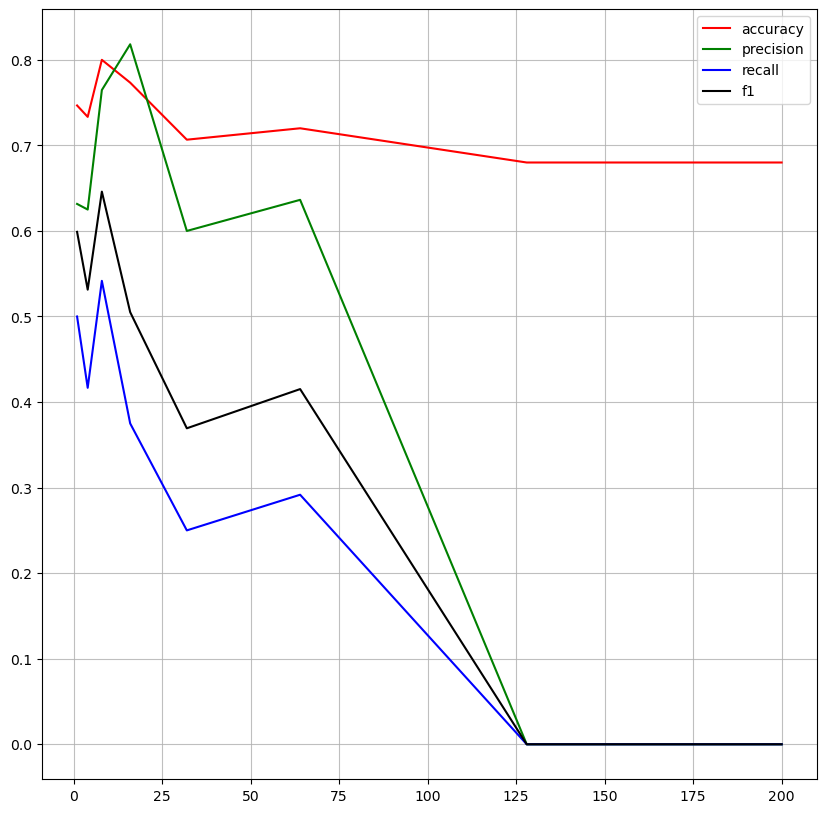

In [376]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

n_neighbors_list = [1,4,8,16,32,64,128,200]
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
for n in n_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    tn,fp,fn,tp = confusion_matrix(y_test,clf.predict(X_test)).ravel()
    accuracy_list.append(calc_metrics(tn,fp,fn,tp,'accuracy'))
    precision_list.append(calc_metrics(tn,fp,fn,tp,'precision'))
    recall_list.append(calc_metrics(tn,fp,fn,tp,'recall'))
    f1_list.append(calc_metrics(tn,fp,fn,tp,'f1'))


plt.figure(figsize=(10,10))
plt.plot(n_neighbors_list,accuracy_list,c='red',label='accuracy')
plt.plot(n_neighbors_list,precision_list,c='green',label='precision')
plt.plot(n_neighbors_list,recall_list,c='blue',label='recall')
plt.plot(n_neighbors_list,f1_list,c='black',label='f1')
plt.grid(True,alpha=0.8)
plt.legend()
plt.show()

According to this chart, the performance of our model seems to have an extreme in n between <span style="font-weight:bold"> 8 and 16 </span>. for larger number of neighbors, all of the metircs fall down. <br>

### Estimating the Distance method ###


The next parameter to check is the method of estimating distance, that could be any of the followings:

<ul>
    <li>cityblock</li>
    <li>cosine</li>
    <li>euclidean</li>
    <li>haversine</li>
    <li>l1</li>
    <li>l2</li>
    <li>manhattan</li>
    <li>nan_euclidean</li>
    <li>minkowski</li>
</ul>

We will check for all of them, and find out which one is the best for our problem.


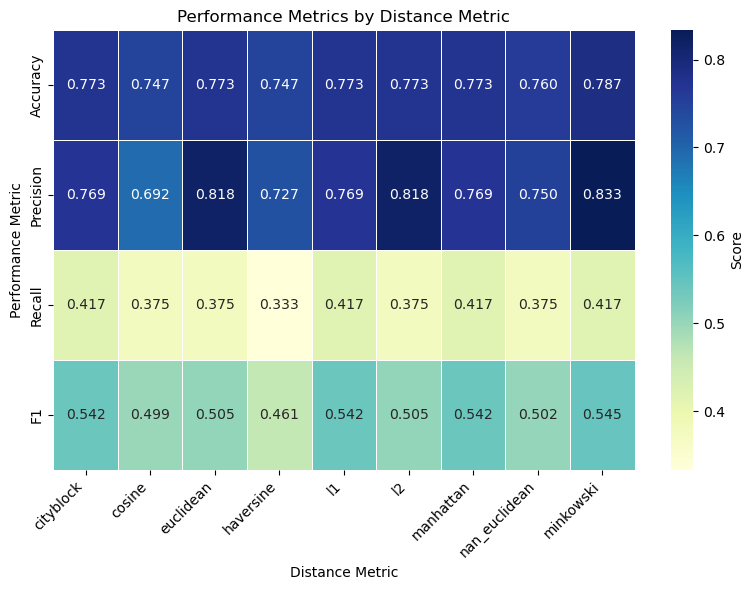

In [419]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Your existing data collection code
metrics_list = ['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean','minkowski']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for metric in metrics_list:
    if (metric == 'minkowski'):
        clf = KNeighborsClassifier(n_neighbors=16, metric=metric,p=3)
    else:
        clf = KNeighborsClassifier(n_neighbors=16, metric=metric)
    clf.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    accuracy_list.append(calc_metrics(tn, fp, fn, tp, 'accuracy'))
    precision_list.append(calc_metrics(tn, fp, fn, tp, 'precision'))
    recall_list.append(calc_metrics(tn, fp, fn, tp, 'recall'))
    f1_list.append(calc_metrics(tn, fp, fn, tp, 'f1'))

# Create a DataFrame for the heatmap
data = {
    'Metric': metrics_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list
}
df = pd.DataFrame(data).set_index('Metric')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.T,  # Transpose to show metrics as columns
    annot=True,  # Show values in cells
    fmt=".3f",  # Format to 3 decimal places
    cmap="YlGnBu",  # Color map (Yellow-Green-Blue)
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)
plt.title('Performance Metrics by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

According to the results, the lowest values of performance indicators belongs to:
<ul>
    <li>Accuracy: Haversine and Cosine</li>
    <li>Precision: Haversine and Cosine </li>
    <li>Recall: Haversine </li>
    <li>F1-score: Haversine and Cosine </li>
</ul>
and the best values:
<ul>
    <li>Accuracy: minkowski(p=3)</li>
    <li>Precision: minkowski(p=3) </li>
    <li>Recall: minkowski(p=3), manhattan, l1, and cityblock</li>
    <li>F1-score: minkowski(p=3) </li>
</ul>

So, Minkowski method with p=3, seems to be the best, and cosine and Harvsine the worst. Both of these two mentioned method, are idealy usefull for different applications. Cosine method is useful, when the angle between points is important. but here it is not the case. The Harvsine is usefull for geospatial data (for example when the data points are specified with latitude and longitude coordinates), and this is not also the case, now.

### Weighting Method ###

Now, we will compare the two possible methods of weighting, that are <span style="font-weight:bold">uniform </span>and <span style="font-weight:bold">distance</span>.

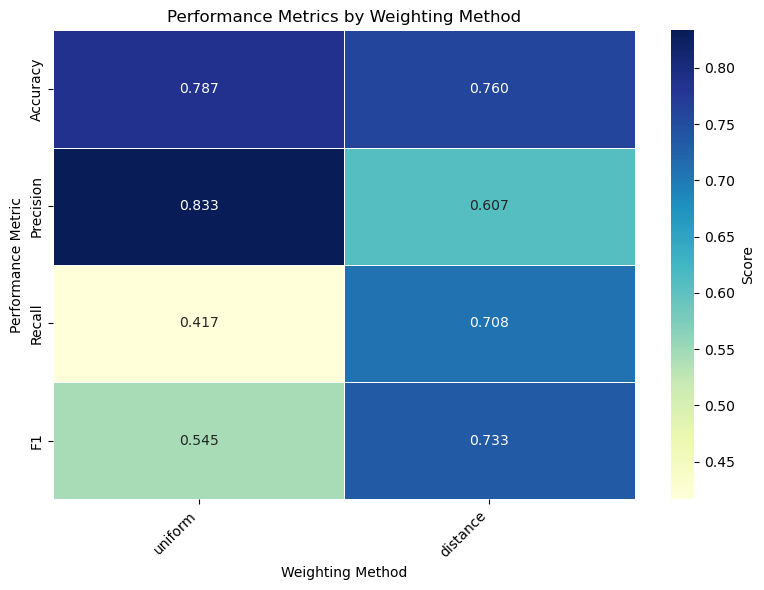

In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

weighting_methods_list = ['uniform','distance']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for weight in weighting_methods_list:
    clf = KNeighborsClassifier(n_neighbors=16, metric='minkowski',p=3,weights=weight)
    clf.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    accuracy_list.append(calc_metrics(tn, fp, fn, tp, 'accuracy'))
    precision_list.append(calc_metrics(tn, fp, fn, tp, 'precision'))
    recall_list.append(calc_metrics(tn, fp, fn, tp, 'recall'))
    f1_list.append(calc_metrics(tn, fp, fn, tp, 'f1'))

data = {
    'Weight': weighting_methods_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1': f1_list
}
df = pd.DataFrame(data).set_index('Weight')

plt.figure(figsize=(8, 6))
sns.heatmap(
    df.T,  # Transpose to show metrics as columns
    annot=True,  # Show values in cells
    fmt=".3f",  # Format to 3 decimal places
    cmap="YlGnBu",  # Color map (Yellow-Green-Blue)
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)
plt.title('Performance Metrics by Weighting Method')
plt.xlabel('Weighting Method')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

According to the results, the Accuracy and Precision for uniform weighting is better, but recall and F1 of distance are higher. <br>
the following chart shows the predictions for uniform and distance weighting.

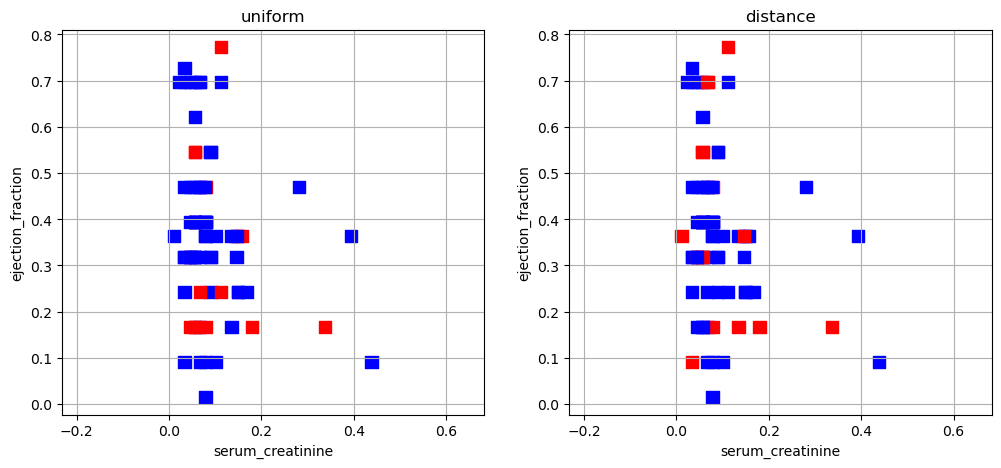

In [448]:

clf = KNeighborsClassifier(n_neighbors=16, metric='minkowski',p=3,weights='uniform')
clf.fit(X_train, y_train)
y_predict_uniform = clf.predict(X_test)
y_predict_uniform_bool = y_test == y_predict_uniform

clf = KNeighborsClassifier(n_neighbors=16, metric='minkowski',p=3,weights='distance')
clf.fit(X_train, y_train)
y_predict_distance = clf.predict(X_test)
y_predict_distance_bool = y_test == y_predict_distance


X_test_points_x_axis = X_test["serum_creatinine"] 
X_test_points_y_axis = X_test["ejection_fraction"]



color_selector = {
    1: 'blue', #True
    0: 'red'   #False
}
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.scatter(
    X_test_points_x_axis,
    X_test_points_y_axis,
    s=80,
    marker='s',
    c=[color_selector[y] for y in y_predict_uniform_bool],
    label='uniform',
)

ax1.set_xlabel('serum_creatinine')
ax1.set_ylabel('ejection_fraction')
ax1.axis('equal')
ax1.grid(True)
ax1.set_title('uniform')

ax2.scatter(
    X_test_points_x_axis,
    X_test_points_y_axis,
    s=80,
    marker='s',
    c=[color_selector[y] for y in y_predict_distance_bool],
    label='distance',
)

ax2.set_xlabel('serum_creatinine')
ax2.set_ylabel('ejection_fraction')
ax2.axis('equal')
ax2.grid(True)
ax2.set_title('distance')


plt.show()

So, the following values for model parameters are selected:
<ul>
    <li>number of neighbors: 16</li>
    <li>Method of estimating distance: Minkowski with p=3</li>
    <li>Weighting method: Distance </li>
</ul>

## Model Evaluation ##

The model with the prepared data and selected parameters is:

In [486]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
X = df[["serum_creatinine","ejection_fraction"]]
y = df["DEATH_EVENT"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['serum_creatinine', 'ejection_fraction'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,stratify=y)

clf = KNeighborsClassifier(n_neighbors=16, metric='minkowski',p=3,weights='distance')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

The predictions on the test data are:

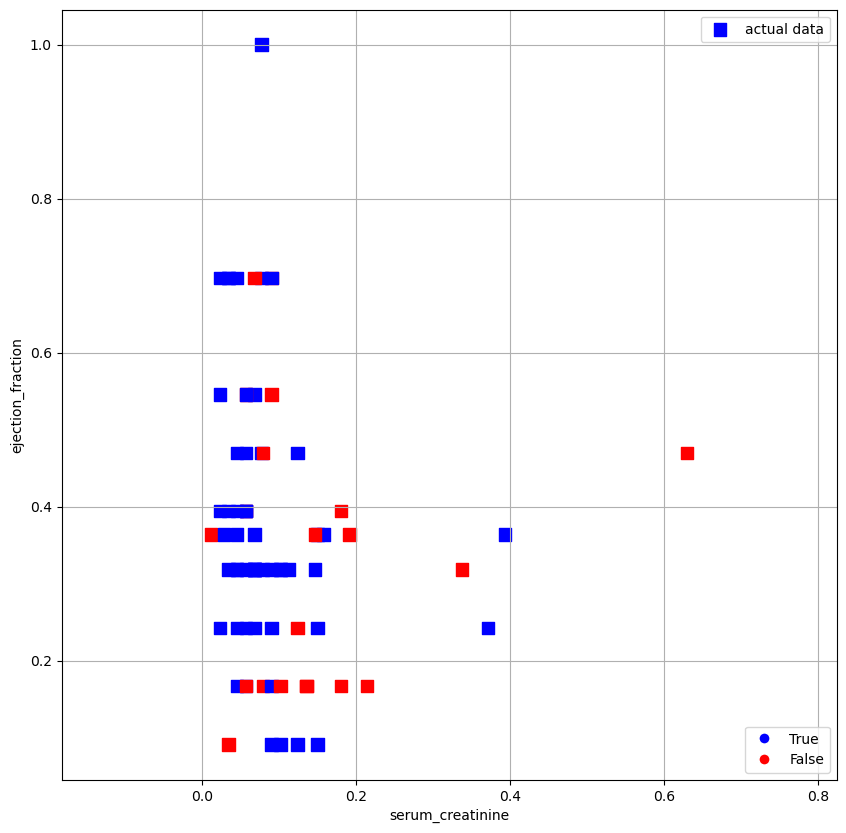

In [489]:
import matplotlib.pyplot as plt

X_test_points_x_axis = X_test["serum_creatinine"] 
X_test_points_y_axis = X_test["ejection_fraction"]

y_predict = clf.predict(X_test)
y_predict_bool = y_test == y_predict
color_selector = {
    1: 'blue', #True
    0: 'red'   #False
}
plt.figure(figsize=(10,10))
plt.scatter(
    X_test_points_x_axis,
    X_test_points_y_axis,
    s=80,
    marker='s',
    c=[color_selector[y] for y in y_predict_bool],
    label='actual data',
)

plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.axis('equal')
plt.grid(True)
plt.legend()
# --- Create custom legend for colors ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='True', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='False', markerfacecolor='red', markersize=8)
]

# Add both legends
first_legend = plt.legend(loc='upper right')  # Default legend (Train/Test)
plt.gca().add_artist(first_legend)  # Prevents overwriting
plt.legend(handles=legend_elements, loc='lower right')  # Color legend
plt.show()            

We will use the following metrics, to evaluate the model:
<ul>
    <li>Confusion Matrix</li>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 score</li>
</ul>

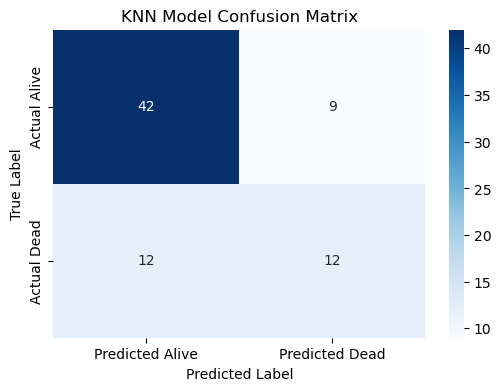

In [497]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Alive', 'Predicted Dead'],
            yticklabels=['Actual Alive', 'Actual Dead'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Model Confusion Matrix')
plt.show()


In [505]:


def calc_metrics(tn, fp, fn, tp,parameter):
    if (parameter == 'accuracy'):
        return (tn+tp)/(tn+tp+fp+fn);
    elif (parameter == 'precision'):
        if (tp+fp != 0):
            return tp/(tp+fp);
        else:
            return 0;
    elif (parameter == 'recall'):
        return tp/(tp+fn);
    elif (parameter == 'f1'):
        precision = (tn+tp)/(tn+tp+fp+fn);
        recall = tp/(tp+fn);
        return (2*(precision*recall)/(precision+recall));
    return 0;

tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()

accuracy = calc_metrics(tn, fp, fn, tp, 'accuracy')
precision = calc_metrics(tn, fp, fn, tp, 'precision')
recall = calc_metrics(tn, fp, fn, tp, 'recall')
f1 = calc_metrics(tn, fp, fn, tp, 'f1')
print(f"accuracy = {accuracy:.2f}")
print(f"precision = {precision:.2f}")
print(f"recall = {recall:.2f}")
print(f"f1 = {f1:.2f}")

accuracy = 0.72
precision = 0.57
recall = 0.50
f1 = 0.59


## Comparison with the Original Paper ##

the following data shows the performance metrics of the current project with the original paper [2]

In [513]:
accuracy_ref2 = 0.624
f1_ref2 = 0.148
data = {
    "": ["Current","Ref [2]"],
    "Accuracy": [accuracy,accuracy_ref2],
    "F1 Score": [f1,f1_ref2]
}
df_comp = pd.DataFrame(data)
df_comp

,,Accuracy,F1 Score
0,Current,0.720,0.590164
1,Ref [2],0.624,0.148000


According to the above table, our scores are much better than thos provided by [2] for KNN model.

## Conclusion & Future Work ##

The project revealed that we have the ability to handle such projects, using available tools. Our results show much more better than the main reference. It could be because of the parameter optimization process, that was handled in this project. <br>
We can handle the following improvments for future works or revisions:
<ul>
    <li>Implement the <span style="font-weight:bold">Feature Selection</span> section, instead of using the ref. data</li>
    <li>Improve the analysis and resaoning for results</li>
    <li>Add literature review</li>
    <li>Improve the codes and coding style, and make the code clean</li>
    <li>Implement more ML methods for this problem</li>
    <li>Add more performane metrics</li>
</ul>

## References ##

<ol>
    <li>
        "Heart Failure Clinical Records," UCI Machine Learning Repository, 2020. [Online]. Available: https://doi.org/10.24432/C5Z89R.        
    </li>
    <li>
        Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5
    </li>
</ol>
